# Explore here

It's recommended to use this notebook for exploration purposes.

In [14]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
import requests
from bs4 import BeautifulSoup

resource_url = "https://es.wikipedia.org/wiki/Leucocito"
res = requests.get(resource_url)

if res:
    with open("leucocito.csv", "wb") as dataset:
        html = res.content
        soup = BeautifulSoup(html, "html")

soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Leucocito - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disab

In [40]:
table = soup.find("table", class_="wikitable")
headers = [header.text for header in table.find_all("th")]

rows = []
for row in table.find_all("tr")[1:]:
    cells = row.find_all("td")
    rows.append([cell.text for cell in cells])

df = pd.DataFrame(rows, columns=headers)
df

,Tipo,Apariencia microscópica,Diagrama,Porcentaje aproximado en adultos,Diámetro (μm),[7]​ Principal objetivo,[4]​ Núcleo,[4]​ Gránulos,[4]​ Vida media[7]​\n
0,Neutrófilo,,,62%,10-12,\nBacterias\nHongos\nVirus\n,Multilobulado,"Fino, ligeramente rosado (tinción HyE)","6 horas-unos cuantos días, dura días en bazo y..."
1,Eosinófilo,,,2.3%,10-12,\nMacroparásitos\nModulan respuesta alérgica i...,Bi-lobulado,Se encuentran en un color rosa-anaranjado,8–12 días; circulan por 4 o 5 horas en el torr...
2,Basófilo,,,0.4%,12-15,Liberan histamina para respuesta inflamatoria,Bi-lobulado o tri-lobulado,Azul oscuro,De pocas horas hasta pocos días\n
3,Linfocito,,,30%,Linfocitos pequeños: 7–8 Linfocitos grandes: 1...,\nLinfocitos B: libera anticuerpos y coopera p...,Es excéntrico y se tiñe fuertemente,Células NK y células CD8 citotóxicas,"Años, para células de memoria; y semanas para ..."
4,Monocito,,,5.3%,12-15[8]​,Los monocitos migran desde el torrente sanguín...,Arriñonado,Ninguno,De horas a días\n


In [46]:
data = df[["Tipo", "Porcentaje aproximado en adultos", "Diámetro (μm)"]]
data

,Tipo,Porcentaje aproximado en adultos,Diámetro (μm)
0,Neutrófilo,62%,10-12
1,Eosinófilo,2.3%,10-12
2,Basófilo,0.4%,12-15
3,Linfocito,30%,Linfocitos pequeños: 7–8 Linfocitos grandes: 1...
4,Monocito,5.3%,12-15[8]​


In [47]:
data.at[3, 'Diámetro (μm)'] = '7-15'
data.at[4, 'Diámetro (μm)'] = '12-15'
data['Porcentaje aproximado en adultos'] = data['Porcentaje aproximado en adultos'].str.rstrip('%').astype(float)

data

C:\Users\Allan\AppData\Local\Temp\ipykernel_6752\2389813724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Porcentaje aproximado en adultos'] = data['Porcentaje aproximado en adultos'].str.rstrip('%').astype(float)


,Tipo,Porcentaje aproximado en adultos,Diámetro (μm)
0,Neutrófilo,62.0,10-12
1,Eosinófilo,2.3,10-12
2,Basófilo,0.4,12-15
3,Linfocito,30.0,7-15
4,Monocito,5.3,12-15


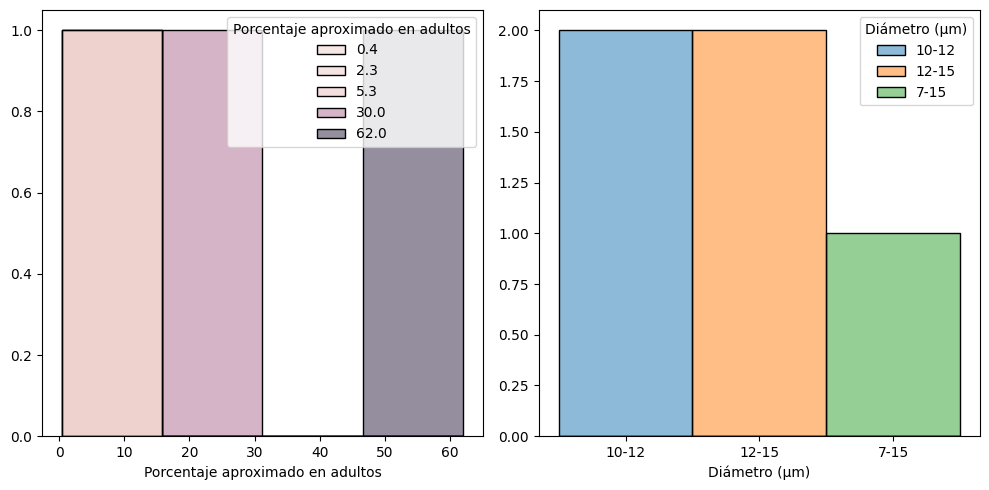

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(ax=axes[0], data=data, x='Porcentaje aproximado en adultos', hue='Porcentaje aproximado en adultos').set(ylabel=None)
sns.histplot(ax=axes[1], data=data, x='Diámetro (μm)', hue='Diámetro (μm)').set(ylabel=None)

plt.tight_layout()
plt.show()

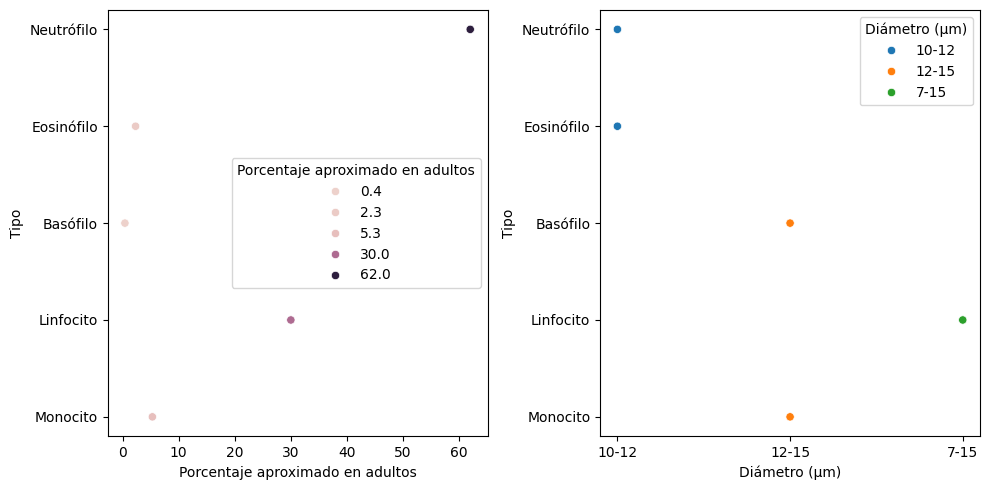

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))


sns.scatterplot(data=data, x="Porcentaje aproximado en adultos", y="Tipo", ax=axes[0], hue="Porcentaje aproximado en adultos")
sns.scatterplot(data=data, x="Diámetro (μm)", y="Tipo", ax=axes[1], hue="Diámetro (μm)")

plt.tight_layout()
plt.show()

C:\Users\Allan\AppData\Local\Temp\ipykernel_6752\515512174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Porcentaje_n"] = pd.factorize(data["Porcentaje aproximado en adultos"])[0]
C:\Users\Allan\AppData\Local\Temp\ipykernel_6752\515512174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Diametro_n"] = pd.factorize(data["Diámetro (μm)"])[0]
C:\Users\Allan\AppData\Local\Temp\ipykernel_6752\515512174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

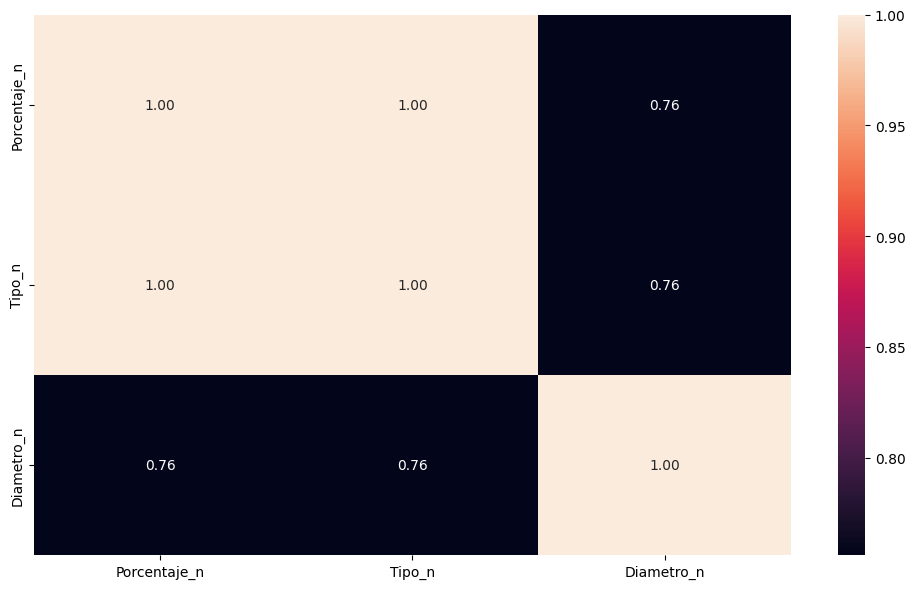

In [112]:
data["Porcentaje_n"] = pd.factorize(data["Porcentaje aproximado en adultos"])[0]
data["Diametro_n"] = pd.factorize(data["Diámetro (μm)"])[0]
data["Tipo_n"] = pd.factorize(data["Tipo"])[0]

fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(data[["Porcentaje_n", "Tipo_n", "Diametro_n"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()